# Simple and Stacked Autoencoder with MNIST - Dense

- fashion_mnist dataset 을 이용한 deep autoencoder 생성


- Mnist dataset 의 손글씨체를 encoding 후 decoding 하여 복원  

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

sample image 시각화

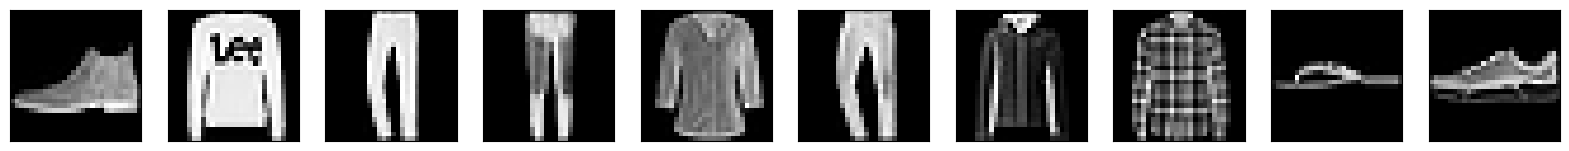

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(20, 4))

for i in range(10):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

- data normalization  
- 2차원 image 를 1 차원으로 변경

In [4]:
X_train = X_train / 255.           
X_test = X_test / 255.

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# stacked autoencoder 작성

In [5]:
input = Input(shape=(784,))

# stacked autoencoder
x = Dense(units=128, activation='relu')(input)
x = Dense(units=64, activation='relu')(x)
encoder = Dense(units=32, activation='relu')(x)

x = Dense(units=64, activation='relu')(encoder)
x = Dense(units=128, activation='relu')(x)
decoder = Dense(units=784, activation='sigmoid')(x)

# autoencoder model
encoder_model = Model(inputs=input, outputs=encoder)
autoencoder = Model(inputs=input, outputs=decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

- model summary 및 시각화

In [6]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

In [7]:
history = autoencoder.fit(X_train, X_train, epochs=50, shuffle=True, 
              batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3909 - val_loss: 0.3224
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3127 - val_loss: 0.3089
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3034 - val_loss: 0.3022
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2982 - val_loss: 0.2980
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2948 - val_loss: 0.2954
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2924 - val_loss: 0.2934
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2906 - val_loss: 0.2916
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2889 - val_loss: 0.2901
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2875 - val_loss: 0.2889
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2865 - val_loss: 0.2880

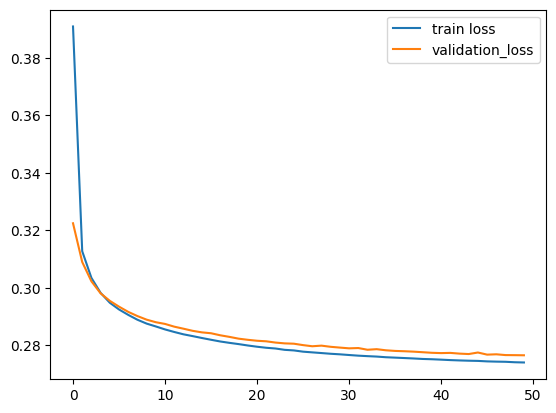

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

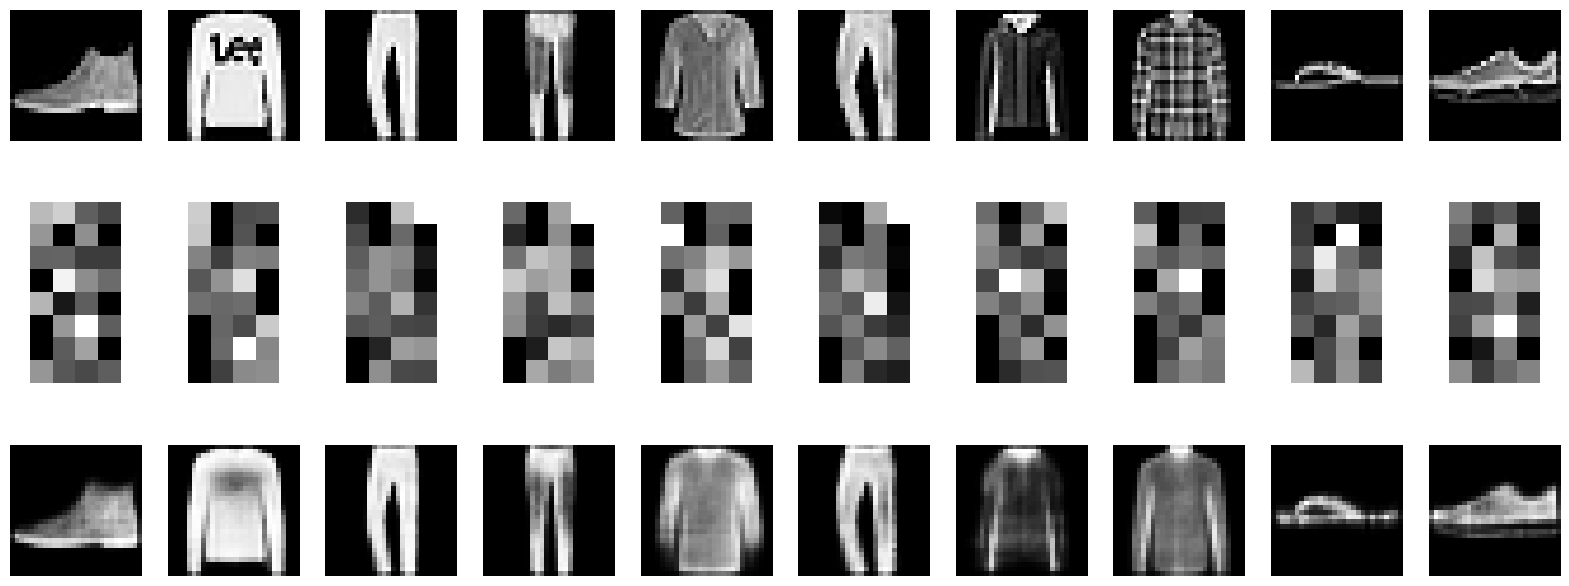

In [9]:
fig, ax = plt.subplots(3, 10, figsize=(20, 8))

for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    
    img = np.expand_dims(X_test[i], axis=0)
    
    ax[1, i].imshow(encoder_model.predict(img, 
                              verbose=0).reshape(8, 4), cmap='gray')
    ax[2, i].imshow(autoencoder.predict(img, 
                            verbose=0).reshape(28, 28), cmap='gray')
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')